<font size=6  color=#003366> <b>LMAPR1492-Physique des matériaux </b> <br><br> 
<b>Tache n°8</b>

<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Préparation</b>
</div>

Le matériau analysé est le mp-31454 dont la formule générale est TaSbRu. 

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Clé API utilisée
C = "ch7bMwOoOiiVhWKKKhy"

# Obtention des informations du matériau
with MPRester(C) as m:
    Pbande = m.get_phonon_bandstructure_by_material_id("mp-31454")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Structure  de bandes électroniques</b>
</div>

On cherche à obtenir un graphe représentant la structure des bandes de phonons. 

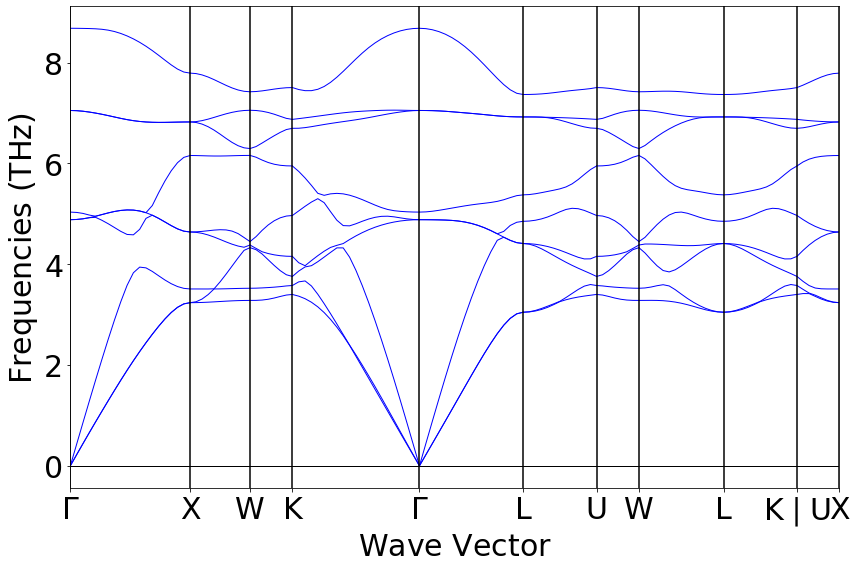

In [3]:
BGraphe = PhononBSPlotter(Pbande)
BGraphe.show()

<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Calcul des vitesses du son</b>
</div>

La vitesse du son se calcule comme $v_s = \frac{df}{dq}$ avec f la fréquence et q représentant le vecteur d'onde. 

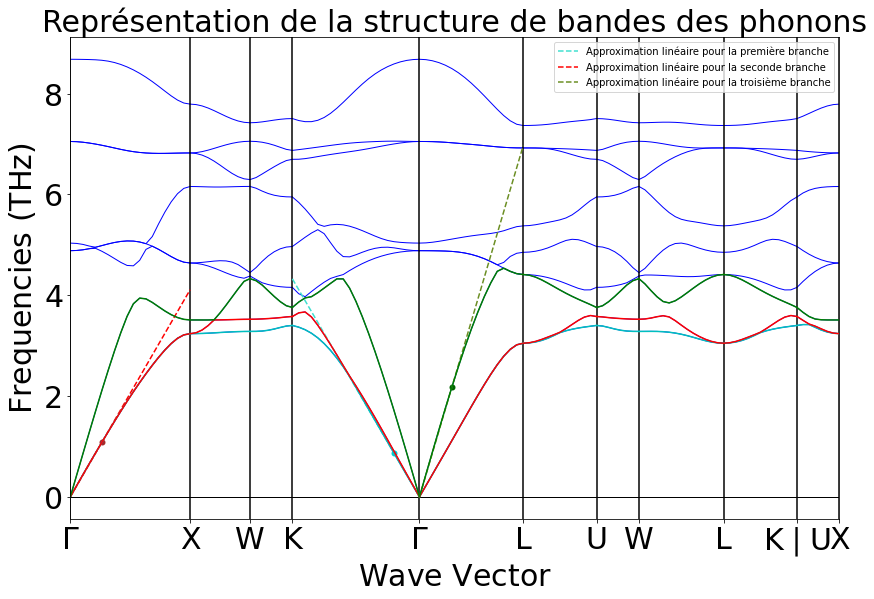

In [4]:
# Récupération des données
data = BGraphe.bs_plot_data()    

distance = data.get('distances')        # Récupération des valeurs des distances
frequence = data.get('frequency')       # Récupération des valeurs des fréquences

# Obtention des pentes
n = 5
X2f = distance[0][n]            # Première pente pour la deuxième branche
Y2f = frequence[0][1][n]
X2d = distance[0][0]
Y2d = frequence[0][1][0]

X1f = distance[4][0]            # Seconde pente pour la première branche
Y1f = frequence[4][0][0]
X1d = distance[3][-n]
Y1d = frequence[3][0][-n]

X3f = distance[4][0]            # Troisième pente pour la troisième branche
Y3f = frequence[4][2][0]
X3d = distance[4][n]
Y3d = frequence[4][2][n]

# Obtention des vitesses 
v2 = (Y2f-Y2d)/(X2f-X2d)
v1 = (Y1f-Y1d)/(X1f-X1d)
v3 = (Y3f-Y3d)/(X3f-X3d) 

# Approximation 
x2 = np.linspace(distance[0][0], distance[1][0],100)
x1 = np.linspace(distance[3][0], distance[4][0],100)
x3 = np.linspace(distance[4][0], distance[5][0],100)
y2 = v2 * x2
y1 = v1 * (x1-distance[4][0])
y3 = v3 * (x3-distance[4][0]) 

# Réalisation du graphe illustrant l'approximation réalisée
plot = BGraphe.get_plot()
plt.plot(x1, y1, '--', color = 'turquoise', label="Approximation linéaire pour la première branche")
plt.plot(x2, y2, '--', color = 'red', label="Approximation linéaire pour la seconde branche")
plt.plot(x3, y3, '--', color = 'olivedrab', label="Approximation linéaire pour la troisième branche")
for i in range(len(distance)):
    plt.plot(distance[i],frequence[i][0],'c')
    plt.plot(distance[i],frequence[i][1],'r')
    plt.plot(distance[i],frequence[i][2],'g')
plt.scatter(X2f,Y2f, color = 'brown', marker = ".", linewidths = 3)
plt.scatter(X1d,Y1d, color = 'darkturquoise', marker = ".", linewidths = 3)
plt.scatter(X3d,Y3d, color = 'darkgreen', marker = ".", linewidths = 3)
plt.title("Représentation de la structure de bandes des phonons", fontsize=30)
plt.legend()
plt.show()

#print(v1, v2, v3) 

La vitesse calculée sur le parcous $K - \Gamma $ pour la première branche vaut 3.977 [Å/ps].   
La vitesse calculée sur le parcous $\Gamma - X $ pour la seconde branche vaut 4.008 [Å/ps].     
La vitesse calculée sur le parcous $\Gamma - L $ pour la troisième branche vaut 7.845 [Å/ps].   